In [1]:
from IPython.display import Image
Image(url='https://vesg.ipsl.upmc.fr/thredds/fileServer/IPSLFS/jservon/CliMAF_Notebooks_html/CliMAF-logo-small.png') 

# CliMAF: Climate Model Assessment Framework
### A science-oriented framework to ease the analysis of climate model simulations
##### WP5 ANR Convergence
##### Development team: Stéphane Sénési (CNRM-GAME), Gaëlle Rigoudy (CNRM-GAME), Jérôme Servonnat (LSCE-IPSL), Ludivine Vignon (CNRM-GAME), Laurent Franchisteguy (CNRM-GAME), Patrick Brockmann (LSCE-IPSL)
##### Beta-testing: Olivier Marti (LSCE-IPSL), Marie-Pierre Moine (CERFACS), Emilia Sanchez-Gomez (CERFACS)
##   
##### contact: climaf@meteo.fr
##### users list: climaf-users@meteo.fr

The goals of CliMAF are to provide the scientists with simplified and science-oriented means for :
- accessing both model and references data
- pre-tretament (period and geographical selections, regridding, averaging like seasonal mean computations...)
- plotting  maps, cross-sections and time series
- building  atlases
- plugging personal scripts in an atlas or in an analysis workflow
- sharing such scripts
- handlling ensembles (multi-model, multi-realization)
CliMAF provides full managment of the outputs by handling the naming of the output files; it also stores the information on "how I obtained this file" under the form of an expression called CRS (CliMAF Reference Syntax) that allows checking for the existing files and avoid recomputing the same files twice (or more).

#  
#   

# Main operators and how to plug your script

How we:
- compute a climatology
- regrid a dataset
- select a geographical region
- use the CliMAF cdo swiss knife: ccdo()
- plug your own operator: simple command line or script

### You will find the complete list of CliMAF operators documented on this page:
https://climaf.readthedocs.io/en/master/std_operators.html

### This notebook is only a way to illustrate the ones we use most of the time

### Use the "Quick search" function to see if an operator already exists for what you want to do! (example: try 'regrid' or 'climatology' in quick search tool)

#  

## First, import climaf

In [2]:
from climaf.api import *

CliMAF version = 1.2.13


CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V1.2.13_post
python => /modfs/modtools-phw/miniconda2/envs/analyse_2.7/bin/python
---
Required softwares to run CliMAF => you are using the following versions/installations:
ncl 6.6.2 => /modfs/modtools-phw/miniconda2/envs/analyse_2.7/bin/ncl
cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump fichier => /modfs/modtools-phw/miniconda2/envs/analyse_2.7/bin/ncdump
Check stamping requirements
nco (ncatted) found -> /opt/nco-4.5.2/bin/ncatted
convert found -> /usr/bin/convert
pdftk found -> /usr/bin/pdftk
exiv2 found -> /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V1.2.13_post/bin/exiv2
---


Cache directory set to : /data/jservon/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/jservon/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


### And set verbosity ('critical' -> minimum ; 'debug' -> maximum)

In [3]:
clog('critical') # min verbosity = critical < warning < info < debug = max verbosity

### ... and dont' forget to open the documentation in case you have questions.
### http://climaf.readthedocs.org/
### -> Use the "Quick search" space to search for what you are interested in, it is really powerfull!
###  

## We use a CMIP5 simulation as toy dataset
### ds() = searching for the data in a science-oriented logic

In [4]:
# -- We use ds() to get the dataset
dat_cmip5 = ds(project='CMIP5',
               model='CNRM-CM5',
               variable='tos',
               experiment='historical',
               period='1980-2000',
               frequency='monthly',
               simulation='r1i1p1',
               version='latest'
               )
summary(dat_cmip5)
# -- summary() gives the list of files found by ds() and the pairs 'facets':'values' associated with the request
# -> The user can then refine the request to select only one file

/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_199001-199912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_200001-200512.nc


{'domain': 'global',
 'experiment': 'historical',
 'frequency': 'monthly',
 'model': 'CNRM-CM5',
 'period': 1980-2000,
 'project': 'CMIP5',
 'realization': 'r1i1p1',
 'realm': '*',
 'root': '/bdd',
 'simulation': 'r1i1p1',
 'table': '*',
 'variable': 'tos',
 'version': 'latest'}

# 1. Compute a climatology: clim_average()
https://climaf.readthedocs.io/en/master/functions_objects.html?highlight=clim_average#clim-average-computes-climatological-averages-on-the-annual-cycle-of-a-dataset

In [5]:
help(clim_average)

Help on function clim_average in module climaf.functions:

clim_average(dat, season)
    Computes climatological averages on the annual cycle of a dataset, on the months
    specified with 'season', either:
    
    - the annual mean climatology (season => 'ann','annual','climato','clim','climatology','annual_average','anm')
    - seasonal climatologies (e.g. season = 'DJF' or 'djf' to compute the seasonal climatology
      over December-January-February; available seasons: DJF, MAM, JJA, SON, JFM, JAS, JJAS
    - individual monthly climatologies (e.g. season = 'january', 'jan', '1' or 1 to get
      the climatological January)
    - annual maximum or minimum (typically makes sense with the mixed layer depth)
    
    Note that you can use upper case or lower case characters to specify the months or seasons.
    
    clim_average computes the annual cycle for you.
    
      >>> dat= ....   # some dataset, with whatever variable
      >>> climds_JFM = clim_average(dat,'JFM')         # 

In [6]:
# -- Annual mean
annual_mean_dat_cmip5 = clim_average(dat_cmip5, 'ANM')

# -- DJF and JJA climatologies
djf_dat_cmip5 = clim_average(dat_cmip5, 'DJF')
jja_dat_cmip5 = clim_average(dat_cmip5, 'JJA')

# -- Climatology of March
march_dat_cmip5 = clim_average(dat_cmip5, 'March')

## 2. Regridding

### First method: regrid dat1 on dat2: regrid()
https://climaf.readthedocs.io/en/master/scripts/regrid.html?highlight=regrid#regrid-regrid-an-object-to-the-grid-of-another-one

Let's get a reference for dat2:

In [8]:
ref = ds(project='ref_climatos',
         variable='tos',
         product='WOA13-v2',
         clim_period='195501-201212'
        ).explore('resolve')
summary(ref)

/data/jservon/Evaluation/ReferenceDatasets/climatos/ocn/mo/tos/WOA13-v2/ac/tos_Omon_WOA13-v2_observations_195501-201212-clim.nc


{'clim_period': '195501-201212',
 'domain': 'global',
 'frequency': 'annual_cycle',
 'obs_type': 'observations',
 'period': fx,
 'product': 'WOA13-v2',
 'project': 'ref_climatos',
 'simulation': 'refproduct',
 'table': 'Omon',
 'variable': 'tos'}

In [9]:
rgrd_annual_mean_dat_cmip5 = regrid(annual_mean_dat_cmip5, ref)
cfile(rgrd_annual_mean_dat_cmip5)

'/data/jservon/climafcache/6e/cf6b68648e5b72eae53198c09a902949b2161ad7f8b9d16c81b0e9.nc'

### Second method: regrid on standard regular cdogrid: regridn()
https://climaf.readthedocs.io/en/master/scripts/regrid.html?highlight=regrid#regrid-regrid-an-object-to-the-grid-of-another-one 

regridn() is based on cdo; you can specify the destination grid (cdogrid) and the regridding method (option='remapcon', 'remapbil'...)

In [10]:
help(regridn)

Help on function regridn in module climaf.operators:

regridn(*args, **dic)
    regridn : regrid an object to a named grid
    ---------------------------------------------------
    
    Interpolate the object to another grid, using CDO
    
    **References** : https://code.zmaw.de/projects/cdo/embedded/1.6.4/cdo.html#x1-5200002.12.1
    
    **Provider / contact** : climaf at meteo dot fr
    
    **Inputs** (in the order of CliMAF call):
      - any dataset (but only one)
    
    **Mandatory arguments**:
      - ``cdogrid`` : target grid name, according to CDO standard 
        (see https://code.zmaw.de/projects/cdo/embedded/1.6.4/cdo.html#x1-150001.3.2)
    
    **Optional arguments**:
      - ``option`` : interpolation option (cf. CDO doc); default : 
        'remapbil' for bilinear interpolation
    
    **Output** : the interpolated object
    
    **Climaf call example** ::
     
      >>> ds= .... #some dataset, with whatever variable
      >>> remapbil_ds=regridn(ds,cdogrid

In [11]:
# -- Standard = remapbil
rgrd_anm_dat_cmip5 = regridn(annual_mean_dat_cmip5, cdogrid='r360x180')
print cfile(rgrd_anm_dat_cmip5)

# -- First order conservative (cdo remapcon)
remapcon_rgrd_anm_dat_cmip5 = regridn(annual_mean_dat_cmip5, cdogrid='r360x180', option='remapcon')
print cfile(remapcon_rgrd_anm_dat_cmip5)

# -- Nearest neighbour
remapnn_rgrd_anm_dat_cmip5 = regridn(annual_mean_dat_cmip5, cdogrid='r360x180', option='remapnn')
print cfile(remapnn_rgrd_anm_dat_cmip5)

/data/jservon/climafcache/86/0b43f3b7af58033e9f4c06b13d915815449a1519557341eebdf8a5.nc
/data/jservon/climafcache/2c/4e423b476b4b63308e7fff75972aac19144d3ece60a473d9e98152.nc
/data/jservon/climafcache/83/e94f36b31fba8fcb1fbdba9f06e6a4fffe81ef5bf3cda08c59c2a8.nc


## 3. Select a geographical region: llbox()
https://climaf.readthedocs.io/en/master/scripts/llbox.html?highlight=llbox#llbox-extract-a-latitude-longitude-box


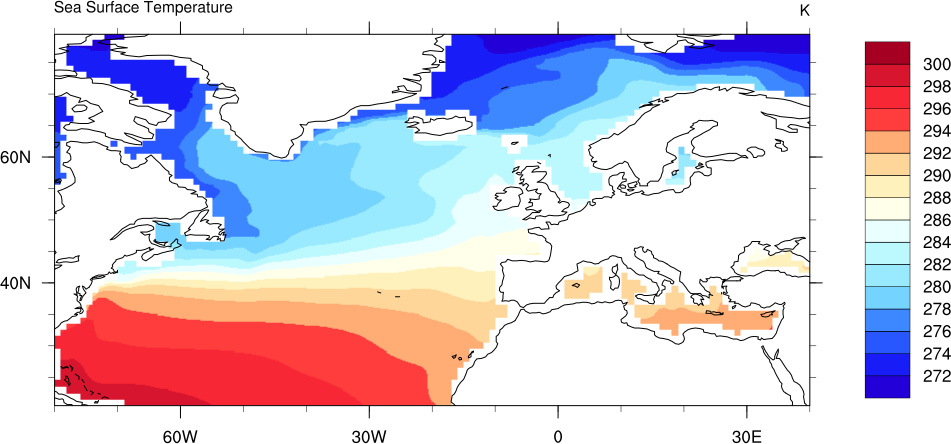

In [12]:
NAtl_anm_dat_cmip5 = llbox(rgrd_anm_dat_cmip5, lonmin=-80, lonmax=40, latmin=20, latmax=80)
implot(NAtl_anm_dat_cmip5)

## 4. Using the CliMAF CDO swiss knife: ccdo()
https://climaf.readthedocs.io/en/master/scripts/ccdo.html?highlight=ccdo#ccdo-sk-invoke-cdo-with-a-unary-operator
    
ccdo() is a very simple way to use any cdo operator, even piped operators, from CliMAF.

You can do A LOT of things with ccdo.

In [13]:
# -- Compute a climatological annual cycle using ymonavg
annual_cycle_dat_cmip5 = ccdo(dat_cmip5, operator='ymonavg')
# --> FYI: the annual_cycle operator already exists -> try in the quick search
cfile(annual_cycle_dat_cmip5)

'/data/jservon/climafcache/5e/260fdc8a4b5b99d520d2bea58e583b1fd56bc3719363589859ef82.nc'

In [14]:
# -- Pipe CDO operators: select a region on a regridded annual cycle
test = ccdo(dat_cmip5, operator='sellonlatbox,-80,40,20,80 -remapbil,r360x180 -ymonavg')
cfile(test)

'/data/jservon/climafcache/75/fbe826142e628e8ac553c1e3c8ff03124770eac819c3ae520c3429.nc'

### Check the CDO users guide to search for the operators that can be interesting for you:
https://code.mpimet.mpg.de/projects/cdo/embedded/cdo.pdf
#  

## 5. Plug your own operator: cscript()
https://climaf.readthedocs.io/en/master/functions_processing.html?highlight=cscript#cscript-define-a-new-climaf-operator

### You can plug any script, binary, command line to make it a CliMAF operator if:
- you can write it in one command line
- that takes an input netcdf file and an output netcdf file or figure as arguments
- and optional arguments

### Simple example with cdo timavg in.nc out.nc

In [15]:
cscript('ctimavg','cdo timavg ${in} ${out}')

CliMAF operator : ctimavg

In [16]:
my_clim = ctimavg(dat_cmip5)

print my_clim.crs

cfile(my_clim)

ctimavg(ds('CMIP5%r1i1p1%tos%1980-2000%global%/bdd%CNRM-CM5%*%historical%r1i1p1%monthly%*%latest'))


'/data/jservon/climafcache/e4/e5c3a6870cbd56244d49072dcdd2b8f3b7c92b1c91c57dbaa6ac97.nc'

### Use ${ins} to stand for multiple input files:
Example with ncrcat: takes multiple files as argument and the last one as output/result file

In [17]:
cscript('cncrcat','ncrcat ${ins} ${out}')

CliMAF operator : cncrcat

### And look at the documentation to see how to:
- deal with ensembles => mmin
- output figures

https://climaf.readthedocs.io/en/master/functions_processing.html?highlight=cscript#cscript-define-a-new-climaf-operator

### Check in ${CLIMAF}/climaf/standard_operators.py to see many examples on how to plug:
- nco and cdo operators
- ncl and python scripts

### TBD: simple examples with simple scripts to focus on how to write your command line

## This was Main_operators_and_how_to_plug_your_script!
##  
##  
## -> go back to the other examples to see more on data access, how to work with ensembles, build an html page...
##  